In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key


In [2]:
# Generating 1500 random lats and longs

lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

lat_lngs = zip(lats, lngs)

In [3]:
#converting zip object into a list

coordinates = list(lat_lngs)


In [4]:
#6.1.5 Generate Random World cities
from citipy import citipy

In [6]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    if city not in cities:
        cities.append(city)

len(cities)


608

In [7]:
#6.2.6 Getting the city weather

#build weather request url with our API

base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=' + weather_api_key

from datetime import datetime

In [8]:
#Create empty list to store weather data
city_data = []
#Create set and record counters
set_count=1
record_count=1
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city. str.replace is used so that cities with spaces in their names are joined together with + as is the url format
    city_url = base_url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("Data Retrieval Complete      ")
print("-----------------------------")

print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | samusu
City not found. Skipping...
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | acarau
Processing Record 4 of Set 1 | port macquarie
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | svetlogorsk
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | necochea
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | grand gaube
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | darbhanga
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | port hedland
Processing Record 17 of Set 1 | srednekolymsk
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | 

In [9]:
#6.2.7 Creating city weather dataframe
city_data_df = pd.DataFrame(city_data)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,59.41,74,0,10.36,ZA,2021-10-01 00:27:41
1,Acarau,-2.8856,-40.1200,78.71,85,64,9.86,BR,2021-10-01 00:30:50
2,Port Macquarie,-31.4333,152.9167,75.88,55,63,7.70,AU,2021-10-01 00:30:51
3,Bluff,-46.6000,168.3333,53.80,76,63,22.46,NZ,2021-10-01 00:30:51
4,Svetlogorsk,52.6333,29.7333,39.25,83,67,6.29,BY,2021-10-01 00:30:51


In [14]:
#reorder columns as  City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-10-01 00:27:41,-33.9258,18.4232,59.41,74,0,10.36
1,Acarau,BR,2021-10-01 00:30:50,-2.8856,-40.1200,78.71,85,64,9.86
2,Port Macquarie,AU,2021-10-01 00:30:51,-31.4333,152.9167,75.88,55,63,7.70
3,Bluff,NZ,2021-10-01 00:30:51,-46.6000,168.3333,53.80,76,63,22.46
4,Svetlogorsk,BY,2021-10-01 00:30:51,52.6333,29.7333,39.25,83,67,6.29


In [16]:
#save dataframe to a csv
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')



In [17]:
#6.3.1 Plot Latitude vs Temp

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



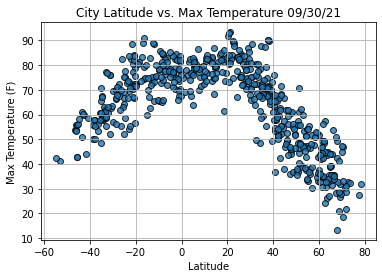

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

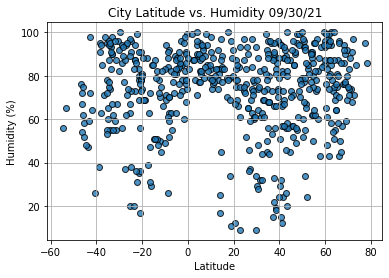

In [19]:
#6.3.2 Lat vs humidity



# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

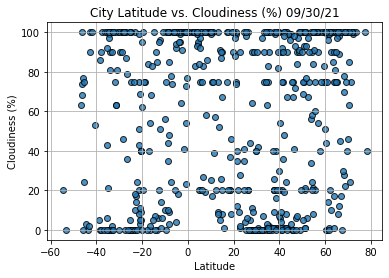

In [20]:
#6.3.3 Lat vs cloudiness 

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

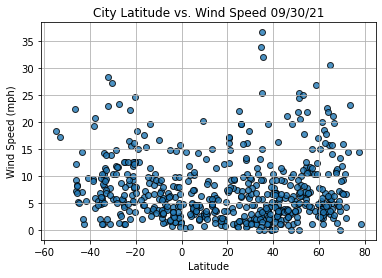

In [21]:
#6.3.4 Lat vs Wind speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
#6.4.2 Finding correlation between Latitude and Maximum Temperature
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()




In [27]:
#Create hemisphere dataframes

northern_hem_df = city_data_df[city_data_df.Lat >= 0]

southern_hem_df = city_data_df[city_data_df.Lat < 0]

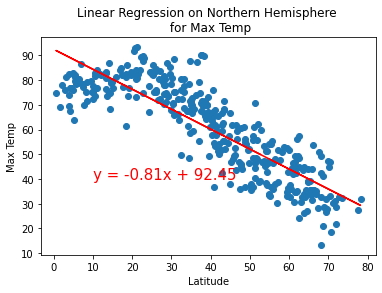

In [30]:
#Linear Reg on temps for North Hem

x_values = northern_hem_df.Lat
y_values = northern_hem_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere \n for Max Temp', 'Max Temp', (10,40))

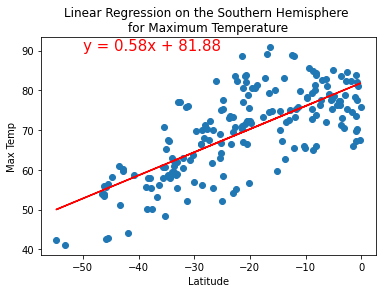

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

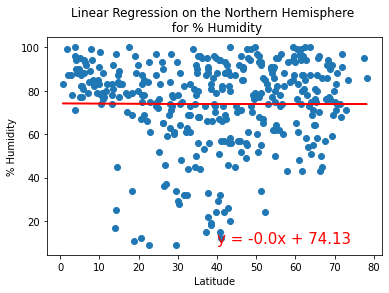

In [40]:
#6.4.3 Humidity Correlation
# Linear regression on the Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


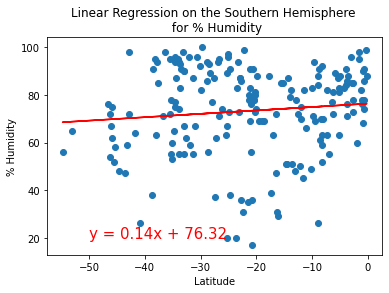

In [42]:
#Southern Hem Humidity

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

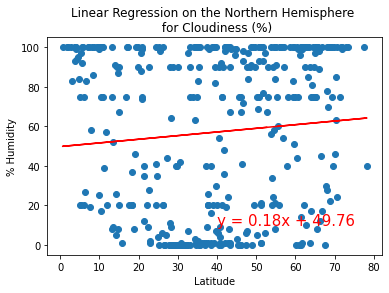

In [45]:
#6.4.4 Cloudiness Correlation

#North
x_values = northern_hem_df.Lat
y_values = northern_hem_df.Cloudiness

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Cloudiness (%)', '% Cloudiness',(40,10))

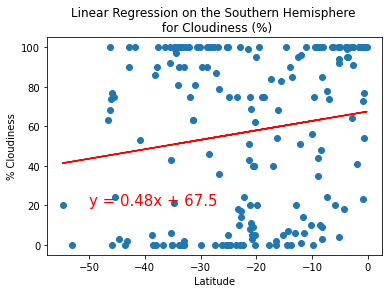

In [48]:
#North
x_values = southern_hem_df.Lat
y_values = southern_hem_df.Cloudiness

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Cloudiness (%)', '% Cloudiness',(-50,20))

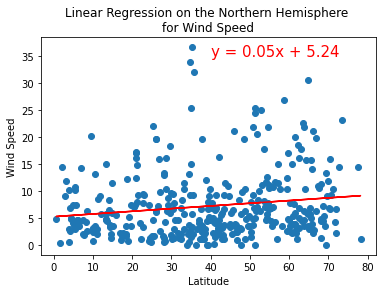

In [49]:
#6.4.5 Wind Speed Correlation
# Linear regression on the Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))


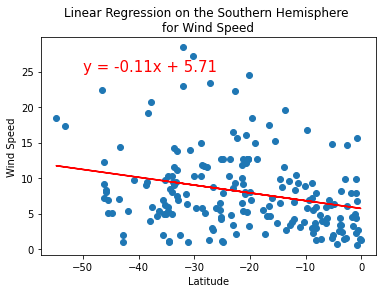

In [53]:
#southern hemi wind speed correlation


x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))